In [3]:
import keras
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [2]:
# Creates a graph.
a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
c = tf.matmul(a, b)
# Creates a session with log_device_placement set to True.
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# Runs the op.
print(sess.run(c))

[[22. 28.]
 [49. 64.]]


# 1. Data Preparation

In [0]:
#max_item_id = 1000		# use as a way to constrict memory errors, increase as needed

## 1.1 Playtime Matrix

Source file: User_items.json 

{'user_id': '76561197970982479',
 'items_count': 277,
 'steam_id': '76561197970982479',
 'user_url': 'http://steamcommunity.com/profiles/76561197970982479',
 'items': [{'item_id': '10',
 'item_name': 'Counter-Strike',
 'playtime_forever': 6,
 'playtime_2weeks': 0},
 {'item_id': '20',
 'item_name': 'Team Fortress Classic',
 'playtime_forever': 0,
 'playtime_2weeks': 0},}
 
 
 We reorganize it as a user_item matrix. This is the main input layer.

## To do
    
1. Instead of Setting limit on games, want to filter out games that are played by less than n people.

In [0]:
# import json
# import pandas as pd
# import ast
# import numpy as np
# from collections import OrderedDict
# from sklearn.preprocessing import MinMaxScaler

# filepath = './user_items.json'
# writefilepath = './user_items_playtime.csv'

# data = []
# game_ids_valid = set()	# We only want to have game ids that appear in any user's game list

# num_games_considered = 0 # Just for profiling
# num_valid_users = 0		# Also profiling

# with open(filepath,encoding='gb18030',errors='ignore') as f:
# 	for line in f:
# 		l = ast.literal_eval(line)	# Convert single quotes in json to proper double quotes

# 		# Don't consider a user that doesn't own any games
# 		if int(l["items_count"]) > 0:		
# 			games = l["items"]
# 			games_filter = []
# 			for g in games:
# 				playtime = g["playtime_forever"]
# 				if playtime > 0:	# Also don't consider games not played
# 					game_id = int(g["item_id"])
# 					if game_id <=  max_item_id: 		# Set limit on games due to space
# 						games_filter.append({game_id: playtime})
# 						game_ids_valid.add(game_id)
# 						num_games_considered += 1

# 			if len(games_filter) >= 1:		
# 				num_valid_users += 1	
# 				data.append({l["user_id"]: games_filter})

# print(max_item_id)
# print(num_games_considered)
# print(len(game_ids_valid))
# print(num_valid_users)

In [0]:
# data

In [0]:
# # Now with format as data (list of nested JSON objects) = 	[	{user_id: [	{item_id: playtime_forever}		]	}	]
# # Convert to dataframe where
# #		item_id		0		..		max_item_id		
# #  user_id 			
# #	x1				playtime_forever
# #	...
# #	xn
# #
# # 
# # Create list of game_id's only based on the valid game ids
# game_list = list(game_ids_valid)
# game_list = sorted(game_list)
# print(*game_list)
# games_dict = OrderedDict()

# df = pd.DataFrame(columns = list(game_list))
# items_list = np.zeros(len(game_list))


# for user in data:
	
# 	# Clear entries of sorted Dictionary (and creates the first set of key-value pairs)
# 	for k in game_list:	
# 		games_dict[k] = 0

# 	key = next(iter(user))	# Note there's only one key. User is {user_id: [...]}
# 	df.loc[key] = 0
# 	items = user[key]
# 	for i in items:
# 		[(k, v)] = i.items()
# 		games_dict[k] = v

# 	# Make the list based on the sorted values in dict
# 	val = list(games_dict.values())
# 	for i in range(len(game_list)):
# 		df.loc[key][game_list[i]] = val[i]

# print(df)

# scaler = MinMaxScaler(feature_range=(0,10))
# scaled_values = scaler.fit_transform(df)
# df.loc[:,:] = scaled_values

# print(df)

# df.to_csv(writefilepath, index=False)

In [0]:
#df

In [6]:
df_matrix = pd.read_csv('./user_items_playtime.csv',engine='python')
df_matrix

,10,20,30,40,50,60,70,80,100,130,...,320,340,360,380,400,420,500,550,620,730
0,0.000168,0.000000,0.000478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.090509,0.0,0.066643,0.085605,0.127577,0.027028,0.042998,0.075009,0.625407
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.051370,0.0,0.071800,0.083626,0.116518,0.000000,0.002421,0.292931,0.007043
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.220157,0.0,0.092824,0.055916,0.200253,0.000000,0.002392,0.125578,0.041699
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.610619,0.047002,0.005427,0.009626,0.434492,0.110746
4,0.002611,0.006291,0.001092,0.000541,0.024064,0.000000,0.014044,0.000643,0.079499,0.042322,...,0.003787,0.046477,0.0,0.194772,0.082636,0.092029,0.000000,0.268841,0.067821,0.526222
5,0.000000,0.000000,0.000000,0.000000,0.034609,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.074404,0.070939,0.0,0.067436,0.136078,0.214867,0.303522,0.324995,0.101393,1.968708
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001721,0.178571,0.0,0.000000,0.207333,0.000000,0.615000,0.222109,0.273059,0.860347
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004161,0.000000,0.000000,0.000000,...,0.000081,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.010210,0.043974,0.312890
8,0.000000,0.001484,0.000000,0.000000,0.000000,0.000000,0.001300,0.000000,0.000000,0.000000,...,0.012171,0.039139,0.0,0.000793,0.238013,0.000395,0.000000,0.065635,0.243968,0.370880
9,0.003032,0.000000,0.000000,0.000000,0.006084,0.000000,0.029519,0.012115,0.062585,0.000000,...,0.003504,0.080724,0.0,0.078940,0.117769,0.110988,0.132979,0.376541,0.274327,0.249105


## 1.2 Game names for each user

In [0]:
# import ast
# import json
# import pandas as pd

# filepath = './user_items.json'
# ##writefilepath = './user_game_names_' + str(max_item_id) + '.csv'
# writefilepath = './user_game_names.csv'

# # max_game_id = 99920 for 100k cap
# # 				= 19990 for 20k cap
# # total cap is 530720

# df = pd.DataFrame(columns = ['userid', 'game_names'])

# with open(filepath,encoding='gb18030',errors='ignore') as f:
# 	single_game = 0
# 	for line in f:
# 		l = ast.literal_eval(line)	# Convert single quotes in json to proper double quotes
	
# 		# Don't consider a user that doesn't own any games
# 		if int(l["items_count"]) > 0:
# 			games = l["items"]
# 			games_filter = []
# 			for g in games:
# 				playtime = g["playtime_forever"]
# 				if playtime > 0:	# Also don't consider games not played
# 					game_id = int(g["item_id"])
# 					if game_id <= max_item_id: 		# Set limit on games due to space
# 						games_filter.append(g["item_name"])
			
# 			if len(games_filter) >= 1:
# 				df.loc[l["user_id"]] = pd.Series({'userid': l["user_id"], 'game_names': games_filter})

# print("Size = {}\nShape ={}". 
# format(df.size, df.shape)) 

# df.to_csv(writefilepath, index=False)

Size = 112546
Shape =(56273, 2)


In [7]:
df_user_gamenames = pd.read_csv('./user_game_names.csv')
df_user_gamenames

,userid,game_names
0,76561197970982479,"['Counter-Strike', 'Day of Defeat', 'Day of De..."
1,js41637,"['Day of Defeat: Source', 'Counter-Strike: Sou..."
2,evcentric,"['Half-Life 2', 'Half-Life 2: Lost Coast', 'Ha..."
3,Riot-Punch,"['Day of Defeat: Source', 'Counter-Strike: Sou..."
4,doctr,"['Day of Defeat: Source', 'Team Fortress Class..."
5,MinxIsBetterThanPotatoes,"['Half-Life: Opposing Force', 'Counter-Strike:..."
6,NitemarePK,"['Counter-Strike: Source', 'Half-Life 2: Death..."
7,themanwich,"['Half-Life 2', 'Half-Life 2: Deathmatch', 'Po..."
8,maplemage,"['Counter-Strike: Source', 'Day of Defeat: Sou..."
9,corrupted_soul,"['Counter-Strike', 'Half-Life: Opposing Force'..."


In [0]:
#transform games names from word to int, using one_hot
from keras.preprocessing.text import one_hot

vocab_size   = 100
encoded_gamenames = [one_hot(d, vocab_size) for d in df_user_gamenames.game_names]

In [9]:
df_user_gamenames_encoded = pd.DataFrame(data=encoded_gamenames).fillna(0.0)    # values
df_user_gamenames_encoded

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,67,74.0,6.0,18.0,3.0,6.0,18.0,75.0,17.0,67.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,18.0,75.0,17.0,67.0,99.0,17.0,35.0,89.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,35,89.0,25.0,35.0,89.0,86.0,30.0,64.0,35.0,89.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6,18.0,75.0,17.0,67.0,99.0,17.0,35.0,89.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,18.0,75.0,17.0,79.0,42.0,42.0,35.0,89.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,35,89.0,13.0,66.0,67.0,99.0,17.0,35.0,89.0,86.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,67,99.0,17.0,35.0,89.0,86.0,48.0,35.0,89.0,86.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,35,89.0,25.0,35.0,89.0,86.0,48.0,46.0,25.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,67,99.0,17.0,6.0,18.0,75.0,17.0,35.0,89.0,86.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,67,74.0,35.0,89.0,13.0,66.0,35.0,2.0,67.0,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 1.3 Other game info

## 1.4 User review

# 2. Model Compilation & Training

In [0]:
# #From https://github.com/marlesson/recsys_autoencoders/blob/master/notebooks/DeepAutoEncoderContent%20-%20Simple%20Train.ipynb
# from keras.optimizers import Adam
# from keras.layers import Input, Dense, Dropout, Embedding, Flatten, add
# from keras.models import Model

# ##Single X
# def autoEncoder(X):
#     '''
#     Autoencoder for Collaborative Filter Model
#     '''
#     users_items_matrix = X
    
#     # Input
#     input_layer   = Input(shape=(users_items_matrix.shape[1],), name='UserScore')
    
#     # Encoder
#     # -----------------------------
#     enc = Dense(512, activation='selu', name='EncLayer1')(input_layer)


#     # Latent Space
#     # -----------------------------
#     lat_space = Dense(256, activation='selu', name='UserLatentSpace')(enc)
#     lat_space = Dropout(0.8, name='Dropout')(lat_space) # Dropout

#     # Decoder
#     # -----------------------------
#     dec = Dense(512, activation='selu', name='DecLayer1')(lat_space)

#     # Output
#     output_layer = Dense(users_items_matrix.shape[1], activation='linear', name='UserScorePred')(dec)

#     # this model maps an input to its reconstruction   
#     model = Model(input_layer, output_layer) 
    
#     return model

In [0]:
#From https://github.com/marlesson/recsys_autoencoders/blob/master/notebooks/DeepAutoEncoderContent%20-%20Simple%20Train.ipynb
from keras.optimizers import Adam
from keras.layers import Input, Dense, Dropout, Embedding, Flatten, add
from keras.models import Model

##Latent space
def autoEncoder(X):
    '''
    Autoencoder for Collaborative Filter Model
    '''
    users_items_matrix, content_info = X
    
    # Input
    input_layer   = Input(shape=(users_items_matrix.shape[1],), name='UserScore')
    input_content = Input(shape=(content_info.shape[1],), name='Itemcontent')
    
    # Encoder
    # -----------------------------
    enc = Dense(512, activation='selu', name='EncLayer1')(input_layer)

    # Content Information
    x_content = Embedding(100, 256, input_length=content_info.shape[1])(input_content)
    x_content = Flatten()(x_content)
    x_content = Dense(256, activation='selu', 
                               name='ItemLatentSpace')(x_content)
    
    # Latent Space
    # -----------------------------
    lat_space = Dense(256, activation='selu', name='UserLatentSpace')(enc)
    lat_space= add([lat_space, x_content], name='LatentSpace')
    lat_space = Dropout(0.8, name='Dropout')(lat_space) # Dropout

    # Decoder
    # -----------------------------
    dec = Dense(512, activation='selu', name='DecLayer1')(lat_space)

    # Output
    output_layer = Dense(users_items_matrix.shape[1], activation='linear', name='UserScorePred')(dec)

    # this model maps an input to its reconstruction
    model = Model([input_layer, input_content], output_layer)    

    return model

In [0]:
# input
##X = df_matrix.values
X = [df_matrix.values, df_user_gamenames_encoded.values]
y = df_matrix.values

In [16]:
# Build model
model = autoEncoder(X)

model.compile(optimizer = Adam(lr=0.00001), loss='mse')
    
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Itemcontent (InputLayer)        (None, 81)           0                                            
__________________________________________________________________________________________________
UserScore (InputLayer)          (None, 24)           0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 81, 256)      25600       Itemcontent[0][0]                
__________________________________________________________________________________________________
EncLayer1 (Dense)               (None, 512)          12800       UserScore[0][0]                  
__________________________________________________________________________________________________
flatten_2 

In [20]:
hist = model.fit(x=X, y=y,
                  epochs=20,
                  batch_size=64,
                  shuffle=True,
                  validation_split=0.1)

Train on 50645 samples, validate on 5628 samples
Epoch 1/20
50645/50645 [==============================] - 7s 142us/step - loss: 0.0088 - val_loss: 4.1409e-04
Epoch 2/20
50645/50645 [==============================] - 7s 134us/step - loss: 0.0084 - val_loss: 3.7410e-04
Epoch 3/20
50645/50645 [==============================] - 7s 132us/step - loss: 0.0079 - val_loss: 3.7292e-04
Epoch 4/20
50645/50645 [==============================] - 7s 138us/step - loss: 0.0076 - val_loss: 3.7139e-04
Epoch 5/20
50645/50645 [==============================] - 7s 145us/step - loss: 0.0072 - val_loss: 3.5760e-04
Epoch 6/20
50645/50645 [==============================] - 7s 134us/step - loss: 0.0069 - val_loss: 3.9712e-04
Epoch 7/20
50645/50645 [==============================] - 7s 133us/step - loss: 0.0068 - val_loss: 3.6715e-04
Epoch 8/20
50645/50645 [==============================] - 7s 133us/step - loss: 0.0066 - val_loss: 3.5478e-04
Epoch 9/20
50645/50645 [==============================] - 7s 134us/step

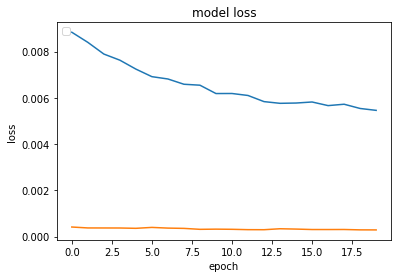

In [22]:
import matplotlib.pyplot as plt

def plot_hist(hist):
    # summarize history for loss
    fig, ax = plt.subplots()  # create figure & 1 axis

    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])

plot_hist(hist)

# 3. Predition and Recommendation

In [25]:
# Set played game to zero, so that we dont recommend games played
pred_matrix = model.predict(X) * (X[0] == 0)
pred_matrix

array([[ 0.        , -0.0070939 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01169256,  0.00180344,  0.009471  , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01268475,  0.00117148, -0.00420324, ..., -0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.00485469,  0.00173606,  0.00338196, ...,  0.00378007,
         0.00340817,  0.        ],
       [ 0.00244523,  0.00372598,  0.003254  , ...,  0.00634969,
         0.00177992,  0.04150476],
       [ 0.00538178,  0.00165374,  0.00354214, ...,  0.00305677,
         0.00370395,  0.        ]], dtype=float32)

In [28]:
# converting the reconstructed matrix back to a Pandas dataframe
pred_matrix_df  = pd.DataFrame(pred_matrix, 
                               columns = df_matrix.columns, 
                               index   = df_matrix.index)
pred_matrix_df.head()

,10,20,30,40,50,60,70,80,100,130,...,320,340,360,380,400,420,500,550,620,730
0,0.000000,-0.007094,0.000000,0.024653,0.001871,0.001903,-0.005828,0.008020,0.017434,0.015846,...,0.013461,0.000000,0.000487,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.011693,0.001803,0.009471,-0.001237,-0.006130,-0.008228,0.011662,-0.003549,0.003061,0.019139,...,-0.009591,0.000000,0.010445,0.000000,0.0,0.0,0.021321,0.0,0.0,0.0
2,0.012685,0.001171,-0.004203,0.012786,0.010352,0.005544,0.025355,-0.002579,-0.001544,0.021804,...,0.003442,0.000000,0.006415,0.000000,0.0,0.0,0.003550,-0.0,0.0,0.0
3,0.003363,-0.032325,0.008395,0.005789,-0.022014,-0.016206,0.006556,0.007080,0.017001,0.019567,...,0.010441,-0.019967,0.010930,0.001915,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.000000,-0.000000,0.000000,0.000000,0.000000,0.004678,-0.000000,0.000000,0.000000,0.000000,...,-0.000000,0.000000,0.000973,0.000000,0.0,0.0,-0.005652,0.0,0.0,0.0


In [38]:
user_id = 0
interact_matrix = df_matrix
topn = 5




We recommend:
            score
game_id          
730      0.625407
300      0.250184
220      0.132304
420      0.127577
340      0.090509


In [0]:
##TO DO:
#Match back to games to report recommend game names
#Match back to games and playtime of this user to report the history, so that we check if recommend make sense
def recommendor(user_id, interact_matrix, topn = 10):
    '''
    Recommender Games
    '''
    pred_scores = interact_matrix.loc[user_id].values #get the user column
    df_scores   = pd.DataFrame({'game_id': list(interact_matrix.columns), 
                             'score': pred_scores})

    print('User played:')
    print(df_scores['game_id'][df_scores['score'] == 0])

    print('We recommend:')
    print(df_scores.set_index('game_id').sort_values('score', ascending=False).head(topn))
    
    return 

In [49]:
recommendor(user_id     = 0, 
                     interact_matrix = df_matrix, 
                     topn = 5)

User played:
1      20
3      40
4      50
5      60
6      70
7      80
8     100
9     130
12    280
14    320
16    360
Name: game_id, dtype: object
We recommend:
            score
game_id          
730      0.625407
300      0.250184
220      0.132304
420      0.127577
340      0.090509
